In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = '../data/data_manipulation_resources/AB_NYC_2019.csv'
df_bnb_o = pd.read_csv(file_path, index_col=0, parse_dates=['last_review'])
df_bnb = df_bnb_o.copy()

In [94]:
file_path = '../data/data_manipulation_resources/astronauts.csv'
df_ast_o = pd.read_csv(file_path)
df_ast = df_ast_o.copy()

In [4]:
df_bnb.dro

AttributeError: 'DataFrame' object has no attribute 'dro'

In [ ]:
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48879 non-null  object        
 1   host_id                         48895 non-null  int64         
 2   host_name                       48874 non-null  object        
 3   neighbourhood_group             48895 non-null  object        
 4   neighbourhood                   48895 non-null  object        
 5   latitude                        48895 non-null  float64       
 6   longitude                       48895 non-null  float64       
 7   room_type                       48895 non-null  object        
 8   price                           48895 non-null  int64         
 9   minimum_nights                  48895 non-null  int64         
 10  number_of_reviews               48895 non-null  int64         
 

name                               99.97
host_id                           100.00
host_name                          99.96
neighbourhood_group               100.00
neighbourhood                     100.00
latitude                          100.00
longitude                         100.00
room_type                         100.00
price                             100.00
minimum_nights                    100.00
number_of_reviews                 100.00
last_review                        79.44
reviews_per_month                  79.44
calculated_host_listings_count    100.00
availability_365                  100.00
dtype: float64

In [5]:
# percentage of missing values in each column
df_bnb.isnull().mean().sort_values(ascending=False)


last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [6]:
df

NameError: name 'df' is not defined

In [7]:
round(df_bnb.isna().mean().sort_values(ascending=False) *100, 2)

last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [8]:
df_bnb.reviews_per_month

id
2539        0.21
2595        0.38
3647         NaN
3831        4.64
5022        0.10
            ... 
36484665     NaN
36485057     NaN
36485431     NaN
36485609     NaN
36487245     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

<Axes: >

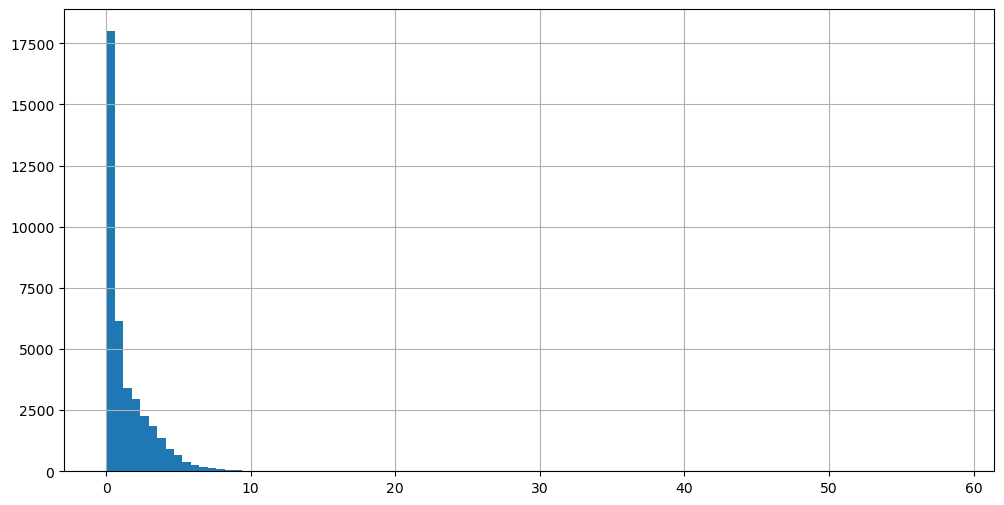

In [9]:
# plot the histogram of the number of reviews per month
df_bnb.reviews_per_month.hist(bins=100, figsize=(12,6))

In [10]:
df_bnb.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


<Axes: >

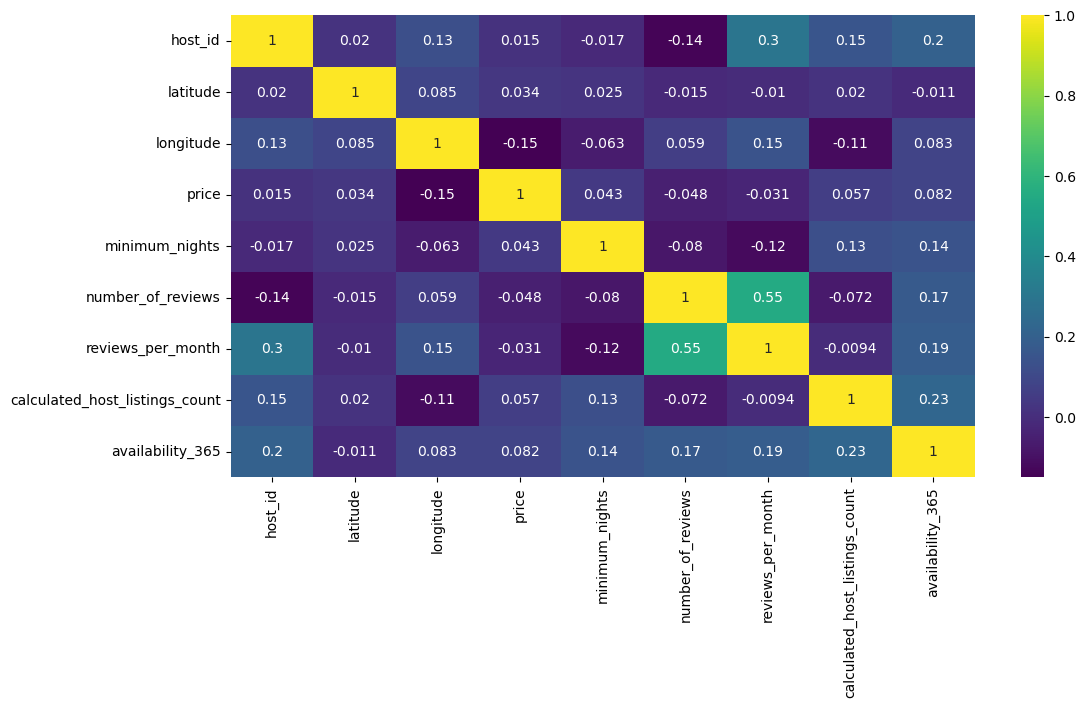

In [11]:
# a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df_bnb.corr(), annot=True, cmap='viridis')


In [12]:
df_bnb[df_bnb.host_name == 'Michael'].sort_values(by="price", ascending=False).head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
20723274,CHIC EVENT SPACE,148391880,Michael,Brooklyn,Flatlands,40.62724,-73.93043,Entire home/apt,1700,1,0,NaT,NaN,1,365
31652254,Photo Studio & Creative Space,5095364,Michael,Manhattan,Nolita,40.72095,-73.99756,Entire home/apt,1200,1,1,2019-02-03,0.19,1,27


In [13]:
df_bnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<Axes: >

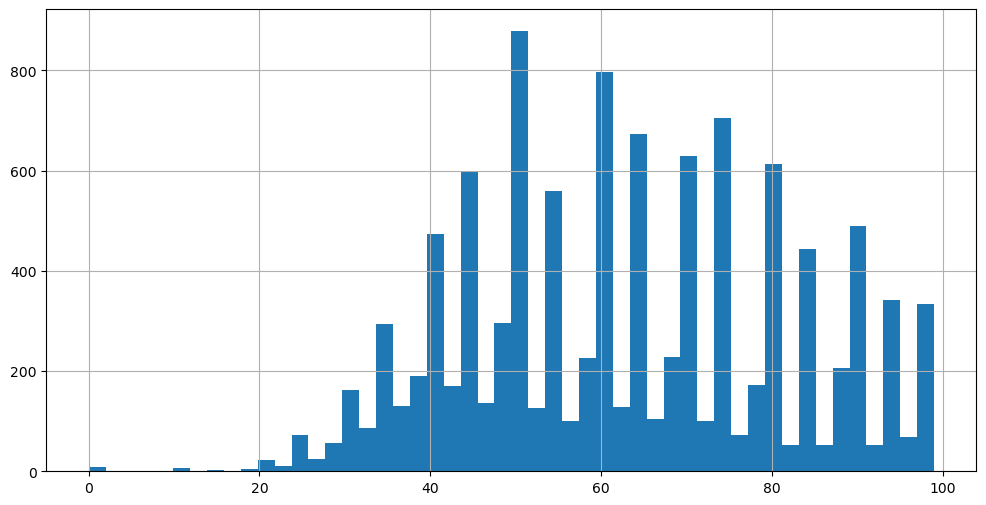

In [14]:
mask = (df_bnb.neighbourhood_group == 'Brooklyn') & (df_bnb.price < 100)
df_bnb[mask].price.hist(bins=50, figsize=(12,6))

In [15]:
df_bnb.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [16]:
df_bnb.groupby('neighbourhood').neighbourhood.count().sort_values(ascending=False)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
New Dorp                 1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64

In [17]:
df_bnb.loc[mask, "price"]

id
3831        89
5121        60
5803        89
7726        99
8025        80
            ..
36479230    42
36481615    54
36482231    40
36484665    70
36485057    40
Name: price, Length: 10904, dtype: int64

In [18]:
df_bnb.iloc[1,:]

name                              Skylit Midtown Castle
host_id                                            2845
host_name                                      Jennifer
neighbourhood_group                           Manhattan
neighbourhood                                   Midtown
latitude                                       40.75362
longitude                                     -73.98377
room_type                               Entire home/apt
price                                               225
minimum_nights                                        1
number_of_reviews                                    45
last_review                         2019-05-21 00:00:00
reviews_per_month                                  0.38
calculated_host_listings_count                        2
availability_365                                    355
Name: 2595, dtype: object

In [19]:
df_bnb.loc[df_bnb.price.between(100, 200), "price"]

id
2539        149
3647        150
5099        200
5238        150
5295        135
           ... 
36482783    190
36483010    200
36483152    170
36484087    125
36485431    115
Name: price, Length: 18634, dtype: int64

In [20]:
df_bnb.loc[df_bnb.price.isin([100, 200]), "price"]

id
5099        200
14322       200
16326       200
18152       200
20913       100
           ... 
36444457    100
36446437    200
36447054    100
36449743    200
36483010    200
Name: price, Length: 3452, dtype: int64

In [21]:
df_bnb.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 2539 to 36455809
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            38821 non-null  object        
 1   host_id                         38821 non-null  int64         
 2   host_name                       38821 non-null  object        
 3   neighbourhood_group             38821 non-null  object        
 4   neighbourhood                   38821 non-null  object        
 5   latitude                        38821 non-null  float64       
 6   longitude                       38821 non-null  float64       
 7   room_type                       38821 non-null  object        
 8   price                           38821 non-null  int64         
 9   minimum_nights                  38821 non-null  int64         
 10  number_of_reviews               38821 non-null  int64         
 

In [22]:
df_bnb.isna().mean().sort_values(ascending=False)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [23]:
df_bnb.dropna(subset=['host_name', "name"], inplace=True)
df_bnb.isna().mean().sort_values(ascending=False)

last_review                       0.205432
reviews_per_month                 0.205432
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [24]:
df_bnb.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [25]:
df_bnb.replace({"John":'Omid', 'Moma':"Mona"}, inplace=True)
df_bnb.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Omid,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


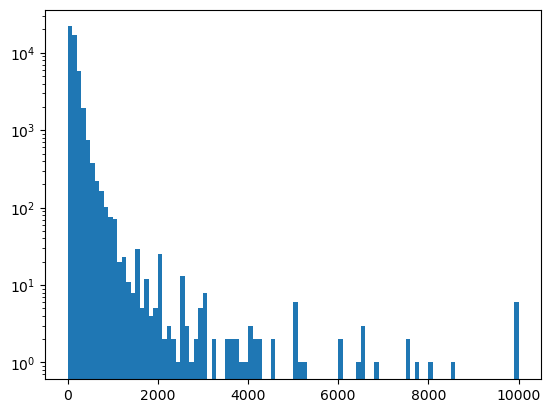

In [26]:
import matplotlib.pyplot as plt
plt.hist(df_bnb.price, bins=100, log=True);

In [27]:
df_bnb.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Omid,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [28]:
df = pd.read_csv('../data/data_manipulation_resources/AB_NYC_2019.csv') 
df['last_review'] = pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [29]:
import pandas as pd

In [30]:
df['num_days'] = pd.to_datetime('2023-01-01') - df.last_review
df['num_day'] = (pd.to_datetime('2023-12-13') - df.last_review).astype('timedelta64[M]')
df[['last_review', 'num_days', 'num_day']].head()   


,last_review,num_days,num_day
0,2018-10-19,1535 days,61.0
1,2019-05-21,1321 days,54.0
2,NaT,NaT,NaN
3,2019-07-05,1276 days,53.0
4,2018-11-19,1504 days,60.0


In [31]:
df_ast.head(2)  

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN


In [32]:
df_test = pd.read_csv('../data/data_manipulation_resources/astronauts.csv', 
                 parse_dates=['Year','Birth Date', 'Death Date' ])

In [33]:
df_test.isna().mean().sort_values(ascending=False) * 100

Death Mission          95.518207
Death Date             85.434174
Military Rank          42.016807
Military Branch        40.896359
Graduate Major         16.526611
Year                    7.563025
Group                   7.563025
Missions                6.442577
Undergraduate Major     6.162465
Alma Mater              0.280112
Birth Place             0.000000
Gender                  0.000000
Birth Date              0.000000
Status                  0.000000
Space Flights           0.000000
Space Flight (hr)       0.000000
Space Walks             0.000000
Space Walks (hr)        0.000000
Name                    0.000000
dtype: float64

In [34]:
df_test['Death Mission'].fillna('No Death Mission', inplace=True)
df_test['Death Mission'] = df_test['Death Mission'].astype('category')
df_test['Death Mission'].dtype

CategoricalDtype(categories=['Apollo 1', 'No Death Mission', 'STS 51-L (Challenger)',
                  'STS-107 (Columbia)'],
, ordered=False)

In [95]:
df =df_test.copy()

In [36]:
df["age_at_zaya"] = (pd.to_datetime('1998-11-11') - df['Birth Date']).astype('timedelta64[Y]')

In [37]:
df.head(2)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,age_at_zaya
0,Joseph M. Acaba,2004-01-01,19.0,Active,1967-05-17,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaT,No Death Mission,31.0
1,Loren W. Acton,NaT,NaN,Retired,1936-03-07,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaT,No Death Mission,62.0


In [38]:
df.isna().mean().sort_values(ascending=False) * 100

Death Date             85.434174
Military Rank          42.016807
Military Branch        40.896359
Graduate Major         16.526611
Group                   7.563025
Year                    7.563025
Missions                6.442577
Undergraduate Major     6.162465
Alma Mater              0.280112
Space Flight (hr)       0.000000
Death Mission           0.000000
Space Walks (hr)        0.000000
Space Walks             0.000000
Name                    0.000000
Space Flights           0.000000
Gender                  0.000000
Birth Place             0.000000
Birth Date              0.000000
Status                  0.000000
age_at_zaya             0.000000
dtype: float64

In [39]:
df.drop(columns=[ 'Military Rank', 'Military Branch', 'Death Date'], inplace=True, axis=1)

In [40]:
df.columns

Index(['Name', 'Year', 'Group', 'Status', 'Birth Date', 'Birth Place',
       'Gender', 'Alma Mater', 'Undergraduate Major', 'Graduate Major',
       'Space Flights', 'Space Flight (hr)', 'Space Walks', 'Space Walks (hr)',
       'Missions', 'Death Mission', 'age_at_zaya'],
      dtype='object')

In [41]:
df[['Year', 'Birth Date', 'Death Date', 'Death Mission']].head(10)

KeyError: "['Death Date'] not in index"

In [ ]:
df.append({'Name':'Omid', 'Year': 2010, 'Group': 20 , } , ignore_index=True).tail(2)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
357,MOzhan,2010,20.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
358,Omid,2010,20.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [ ]:
df_sis = pd.DataFrame({'Name':['MOzhan'], 'Year': [2010], 'Group': [20] } )
df = df.append(df_sis, ignore_index=True)

In [ ]:
df.tail(4)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
355,John W. Young,1962-01-01 00:00:00,2.0,Retired,1930-09-24,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6.0,835.0,3.0,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaT,No Death Mission
356,George D. Zamka,1998-01-01 00:00:00,17.0,Retired,1962-06-29,"Jersey City, NJ",Male,US Naval Academy; Florida Institute of Technology,Mathematics,Engineering Management,Colonel,US Marine Corps (Retired),2.0,692.0,0.0,0.0,"STS-120 (Discovery), STS-130 (Endeavor)",NaT,No Death Mission
357,MOzhan,2010,20.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
358,MOzhan,2010,20.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [ ]:
df.Name.str.split(' ',1,  expand=True)

,0,1
0,Joseph,M. Acaba
1,Loren,W. Acton
2,James,C. Adamson
3,Thomas,D. Akers
4,Buzz,Aldrin
...,...,...
354,Alfred,M. Worden
355,John,W. Young
356,George,D. Zamka
357,MOzhan,None


In [620]:
import numpy as np 
dft = pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.normal(loc=0, scale= 10, size=1000),
    'C': np.random.exponential(scale= 10, size=1000),
})
dft.head()

,A,B,C
0,-2.168341,13.514794,9.369012
1,0.543083,-5.666937,6.237559
2,-0.685822,3.117294,8.251778
3,-1.161456,3.423920,18.811310
4,-1.130971,-3.204415,14.359734


In [623]:
dft.A.apply()

0     -2.168341
1      0.543083
2     -0.685822
3     -1.161456
4     -1.130971
         ...   
995   -2.424605
996    0.682089
997    0.429809
998    0.858892
999    0.389111
Name: A, Length: 1000, dtype: float64

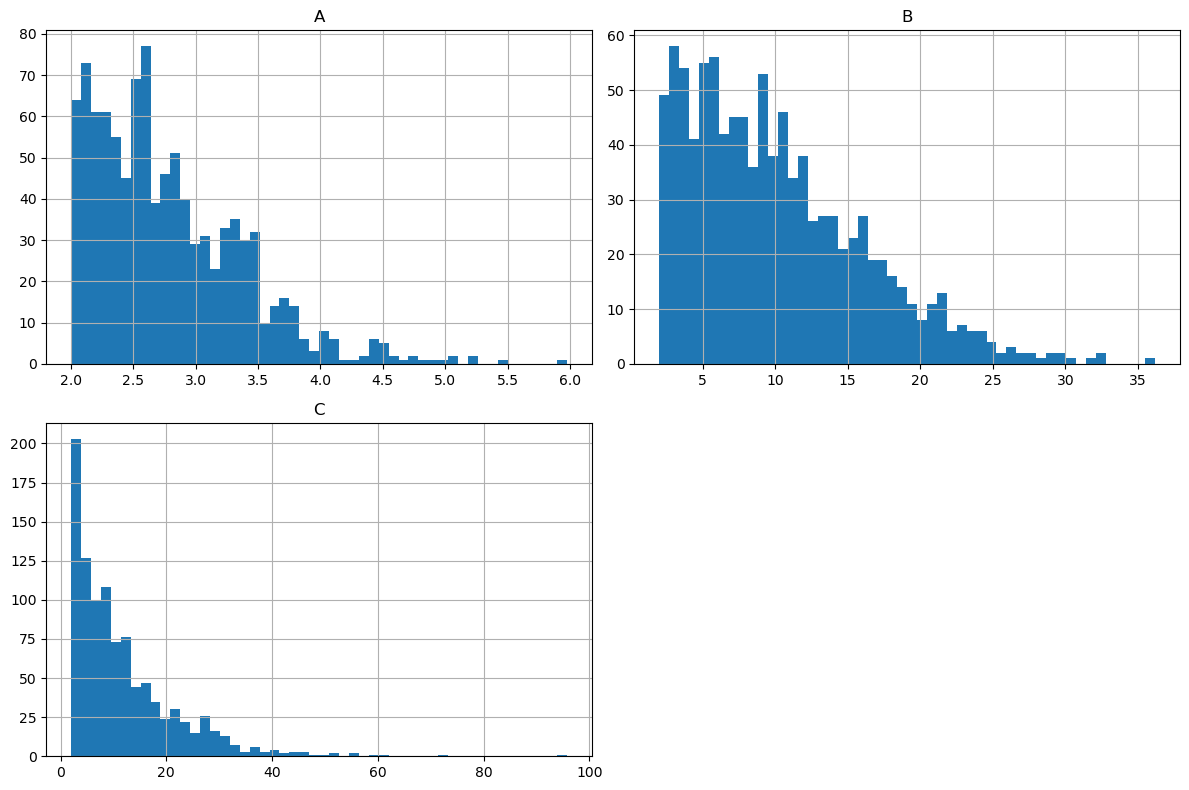

In [619]:
dft.hist(figsize=(12, 8), bins=50);
plt.tight_layout()
plt.show()


In [618]:
dft = dft.apply(lambda x: np.abs(x) + 2)

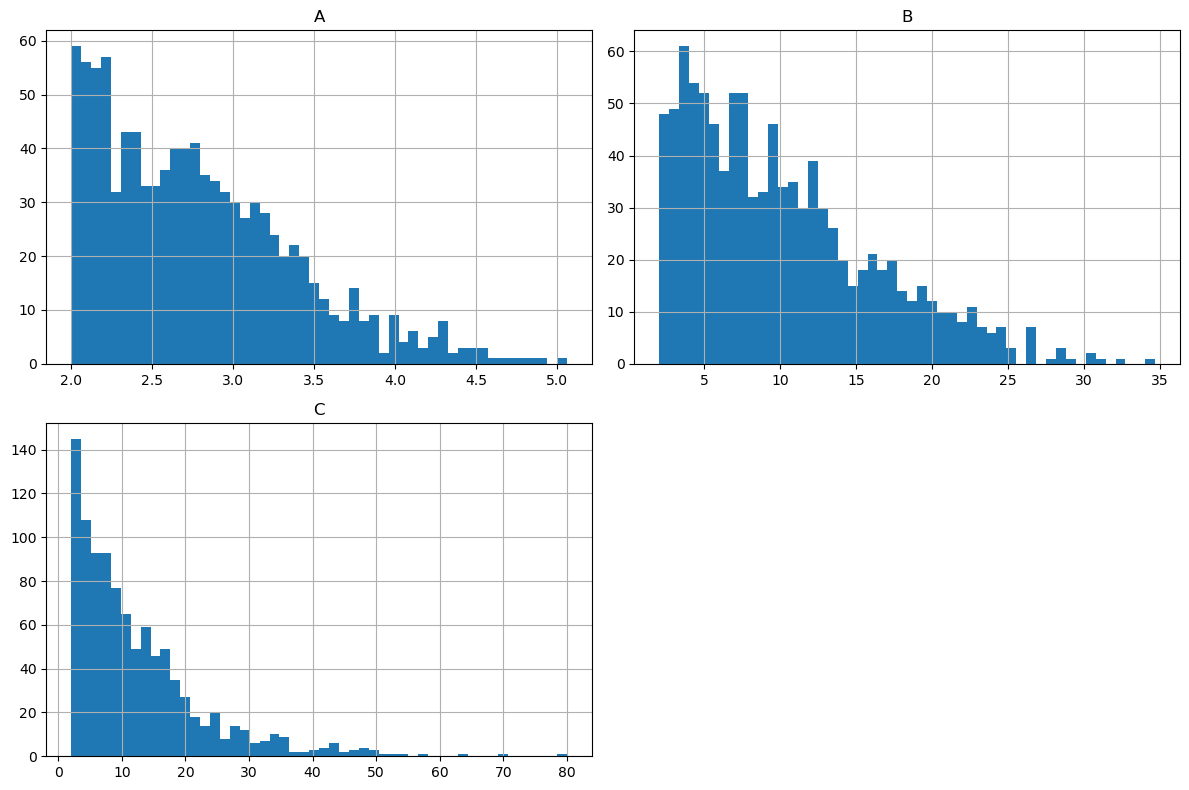

In [59]:
dft.hist(figsize=(12, 8), bins=50);
plt.tight_layout()
plt.show()

In [ ]:
dft.A.

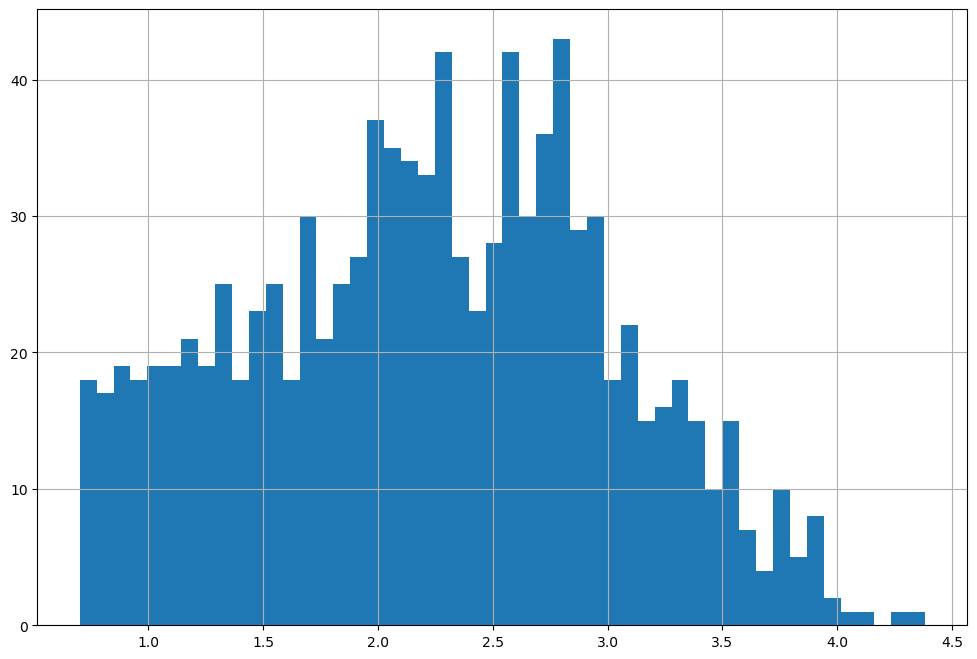

In [60]:
dft.C.apply(np.log).hist(figsize=(12, 8), bins=50);

In [61]:
def double_if_positive(x):
    if x >0:
        return x*2
    else:
        return x

In [608]:
data1 = {
    'Product': ['Laptop', 'Smartphone', 'Headphones', 'Camera'],
    'Price': [1200, 800, 150, 500],
    'Category': ['Electronics', 'Electronics', 'Accessories', 'Electronics']
}
df1 = pd.DataFrame(data1)
df1.head()


,Product,Price,Category
0,Laptop,1200,Electronics
1,Smartphone,800,Electronics
2,Headphones,150,Accessories
3,Camera,500,Electronics


In [63]:
def apply_discount(row):
    if row['Category'] == 'Electronics' and row['Price'] > 1000:
        return row['Price'] * 0.9  # 10% discount
    elif row['Category'] == 'Accessories':
        return row['Price'] * 0.85  # 15% discount
    else:
        return row['Price']  # no discount

df1['Discounted_Price'] = df1.apply(apply_discount, axis=1)


In [64]:
df1

,Product,Price,Category,Discounted_Price
0,Laptop,1200,Electronics,1080.0
1,Smartphone,800,Electronics,800.0
2,Headphones,150,Accessories,127.5
3,Camera,500,Electronics,500.0


In [65]:
data2 = {
    'Feature1': [10, 20, 30, 40],
    'Feature2': [5, 15, 25, 35],
    'Weight': [1.5, 2.0, 2.5, 3.0]
}
df2 = pd.DataFrame(data2)


In [66]:
calculate  = pd.DataFrame({
    'r': np.random.randint(3, 10, size= 100),
    'h': np.random.randint(10, 100, size= 100)
})

In [67]:
calculate

,r,h
0,4,38
1,3,43
2,5,65
3,3,40
4,7,50
...,...,...
95,7,35
96,7,79
97,3,84
98,7,85


In [68]:
def calculate_volumn_area(row):
    if row['r'] > 5 and row['h'] < 30:
        volume = np.pi * row['r']**2 * row['h']
        surface_area = 2 * np.pi * row['r'] * (row['r'] + row['h'])
        return volume, surface_area
    else:
        return 0, None

In [69]:
calculate.apply(calculate_volumn_area, axis=1, result_type='expand')

,0,1
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
95,0.0,NaN
96,0.0,NaN
97,0.0,NaN
98,0.0,NaN


In [70]:
data3 = {'Text': ['Hello World!', 'Python is cool', 'Pandas and Numpy', 'Data Science']}
df3 = pd.DataFrame(data3)


In [71]:
def string_operations(text):
    if 'Python' in text:
        return text.upper()
    elif '!' in text:
        return text.replace('!', '?')
    else:
        return text[::-1]  # reverse the string

df3['Processed_Text'] = df3['Text'].apply(string_operations)


,Text,Processed_Text
0,Hello World!,Hello World?
1,Python is cool,PYTHON IS COOL
2,Pandas and Numpy,ypmuN dna sadnaP
3,Data Science,ecneicS ataD


In [625]:

def double_negative(y):
    y[y<0]**=2
    y[y>=0]/=2
    return y
  

In [626]:
import pandas as pd
import numpy as np

In [627]:
dft.apply(double_negative)


,A,B,C
0,2.350850,6.757397,4.684506
1,0.271541,16.057087,3.118780
2,0.235176,1.558647,4.125889
3,0.674490,1.711960,9.405655
4,0.639548,5.134138,7.179867
...,...,...,...
995,2.939354,61.790788,6.072471
996,0.341044,23.915677,4.334406
997,0.214904,0.392638,6.888414
998,0.429446,6.270516,3.705881


In [104]:
 df.Name.str.split(' ', n=2, expand=True)


,0,1,2
0,Joseph,M.,Acaba
1,Loren,W.,Acton
2,James,C.,Adamson
3,Thomas,D.,Akers
4,Buzz,Aldrin,None
...,...,...,...
352,David,A.,Wolf
353,Neil,W.,Woodward III
354,Alfred,M.,Worden
355,John,W.,Young


In [21]:
df_h = pd.DataFrame( np.random.normal(10, 10, size=(10000, 4)) , columns=['A', 'B', 'C', 'Y'])

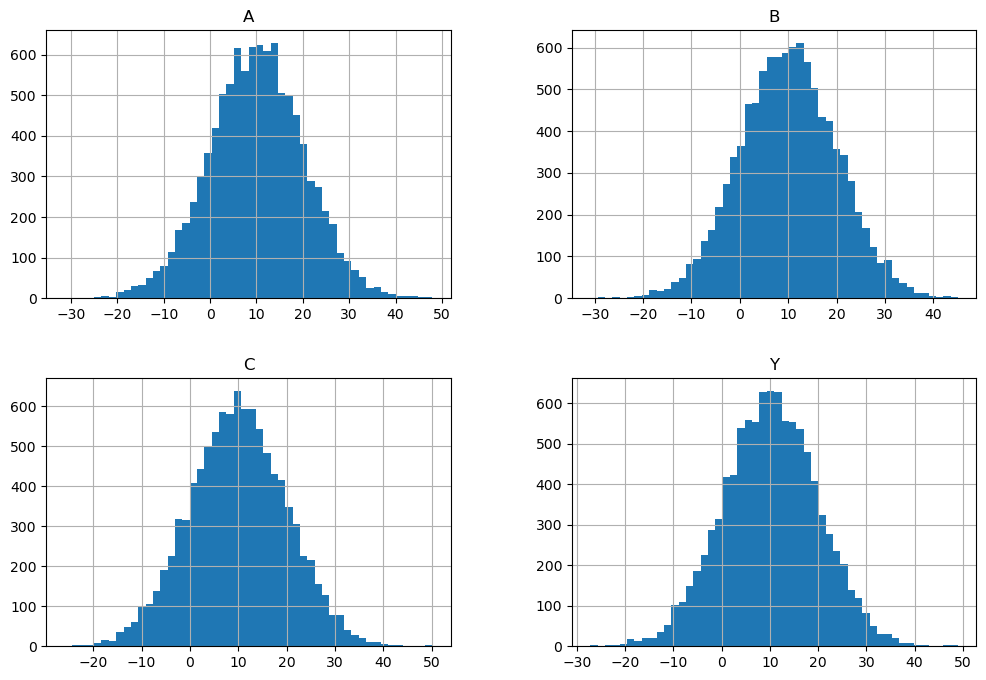

In [22]:
df_h.hist(figsize=(12, 8), bins=50);

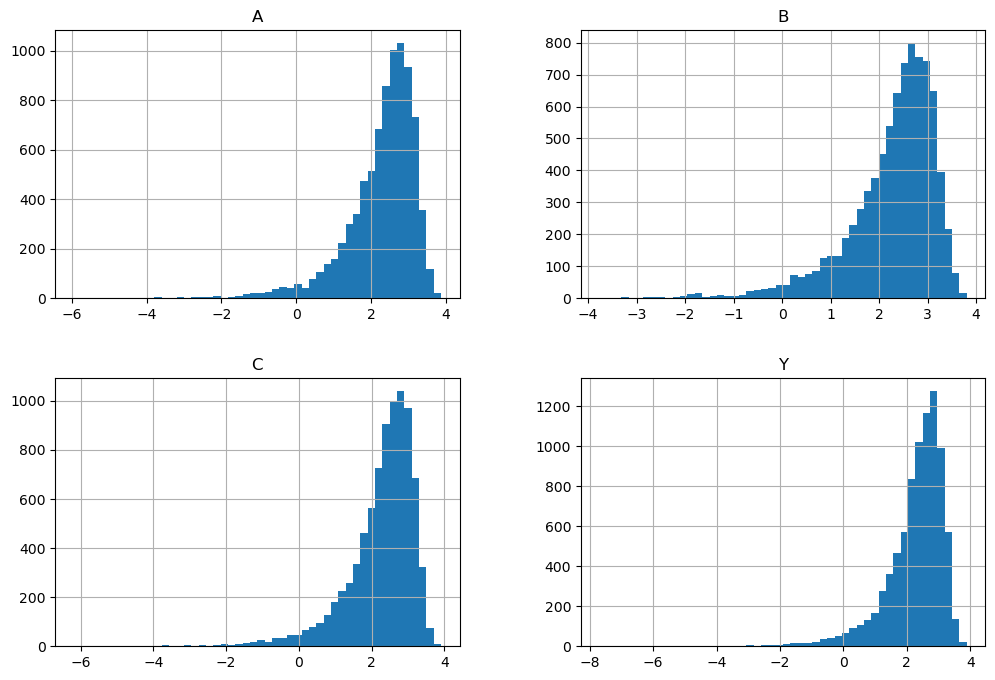

In [23]:
df_h.apply(np.log).hist(figsize=(12, 8), bins=50);

In [24]:
df_h.head()

,A,B,C,Y
0,33.156632,-2.477703,-6.255988,8.750408
1,13.413085,10.745669,1.631629,21.004695
2,12.237099,21.044450,18.480067,-6.602762
3,24.215740,10.477983,4.791428,18.888882
4,18.279548,33.418914,9.837169,13.406624


In [25]:
df_h["lost"] = ((df_h.A -df_h.A.mean())**2 +(df_h.B -df_h.B.mean())**2 +(df_h.C -df_h.C.mean())**2 )**.5

<Axes: >

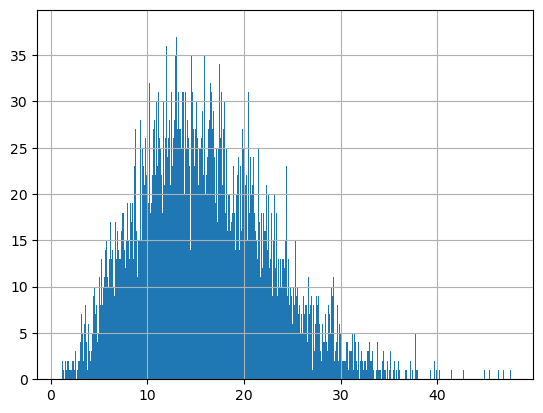

In [26]:
df_h.lost.hist(bins=1000)

In [27]:
X = df_h[['A', 'B', 'C']].values
np.column_stack((X, np.ones(X.shape[0])))

array([[33.15663182, -2.47770265, -6.25598794,  1.        ],
       [13.41308466, 10.74566886,  1.63162904,  1.        ],
       [12.2370991 , 21.04445003, 18.4800673 ,  1.        ],
       ...,
       [ 7.65930694,  7.76284429, -1.87505682,  1.        ],
       [31.29085766, -4.89993422, 25.05573709,  1.        ],
       [15.75960725,  8.13577142, -6.74926517,  1.        ]])

In [29]:
Y = df_h.Y
np.linalg.inv(X.T @ X) @ X.T @ Y

array([0.2385863 , 0.26026573, 0.25466322])

In [43]:
X = [[1,2,3],[4,5,6],[7,8,9], [10,11,12]]
Y = [[10],[20], [30], [40]]
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(Y)

In [44]:
X

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

In [45]:
df_x

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [46]:
df_x.T

,0,1,2,3
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


In [47]:
df_x.T@df_x

,0,1,2
0,166,188,210
1,188,214,240
2,210,240,270


AttributeError: 'DataFrame' object has no attribute 'df_x'

In [56]:
A_dot_df = pd.DataFrame([[1, 2], [3, 4]])
B_dot_df = pd.DataFrame([[2, 2], [3, 3]])
dot_product = A_dot_df.multiply(B_dot_df)
print(A_dot_df , '\n', B_dot_df ,'\n', dot_product)


   0  1
0  1  2
1  3  4 
    0  1
0  2  2
1  3  3 
    0   1
0  2   4
1  9  12


In [57]:
A_matrix_df = pd.DataFrame([[1, 2], [3, 4]])
B_matrix_df = pd.DataFrame([[2, 0], [1, 2]])
matrix_product = A_matrix_df.dot(B_matrix_df)
print(A_dot_df , '\n', B_dot_df ,'\n', matrix_product)

   0  1
0  1  2
1  3  4 
    0  1
0  2  2
1  3  3 
     0  1
0   4  4
1  10  8


In [64]:
A_matrix_df@B_matrix_df

,0,1
0,4,4
1,10,8


In [63]:
import time

start_time = time.time()

# Your code here

end_time = time.time()
execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
print(f"Execution time: {execution_time} ms")


Execution time: 0.008821487426757812 ms


In [65]:
A_matrix_df

,0,1
0,1,2
1,3,4


In [66]:
inv(A_matrix_df)

NameError: name 'inv' is not defined

In [137]:
dft = pd.read_csv('../data/data_manipulation_resources/AB_NYC_2019.csv',index_col='id', parse_dates=['last_review'])
dft.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [138]:
dft.drop(columns=['latitude', 'longitude', 'host_name', 'name']).head(2)

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
2539,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [139]:
dft.isna().mean().sort_values(ascending=False)*100

last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [140]:
dft[dft.host_name == "Taz"].head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
24491624,43rd Street=TIME SQUARE\nPRIVATE BEDROOM,30985759,Taz,Manhattan,Hell's Kitchen,40.75780,-73.99211,Private room,116,1,95,2019-07-04,6.42,6,280
24539281,43rd Street “TIME SQUARE”\nSingle bed.,30985759,Taz,Manhattan,Hell's Kitchen,40.75792,-73.99172,Shared room,65,1,108,2019-06-23,7.33,6,325


In [172]:
affordable_short = (dft.price < 200) & (dft.price >= 100) & (dft.minimum_nights < 2)
dft[affordable_short].sort_values(by="number_of_reviews", ascending=False).head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
945297,East Village Gay Friendly Dbl Room,5074654,Seth,Manhattan,East Village,40.72836,-73.98163,Private room,100,1,414,2019-06-22,5.39,2,231


In [144]:
df = dft.drop(columns=['latitude', 'longitude', 'host_name', 'name', 'availability_365','minimum_nights'])
df.head(2)

,host_id,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
id,,,,,,,,,
2539,2787,Brooklyn,Kensington,Private room,149,9,2018-10-19,0.21,6
2595,2845,Manhattan,Midtown,Entire home/apt,225,45,2019-05-21,0.38,2


In [167]:
mask_2019 = df.last_review.dt.year == 2019

In [170]:
df.loc[mask_2019,:].head(2)

,host_id,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
id,,,,,,,,,
2595,2845,Manhattan,Midtown,Entire home/apt,225,45,2019-05-21,0.38,2
3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,270,2019-07-05,4.64,1


In [160]:
mask = df.neighbourhood_group == "Brooklyn"

In [171]:
df.loc[mask,:].head(2)

,host_id,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
id,,,,,,,,,
2539,2787,Brooklyn,Kensington,Private room,149,9,2018-10-19,0.21,6
3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,270,2019-07-05,4.64,1


In [507]:
df = pd.read_csv('../data/P87-S5-Grouping-Resources/train.csv',
                  parse_dates=["Date"], low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [479]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [480]:
df.isna().mean().sort_index(ascending=False)*100

Store            0.0
StateHoliday     0.0
SchoolHoliday    0.0
Sales            0.0
Promo            0.0
Open             0.0
DayOfWeek        0.0
Date             0.0
Customers        0.0
dtype: float64

In [481]:
df.groupby('StateHoliday')['StateHoliday'].count()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [482]:
dft.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [483]:
dft['last_review'] = pd.to_datetime(dft['last_review'])

In [484]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48879 non-null  object        
 1   host_id                         48895 non-null  int64         
 2   host_name                       48874 non-null  object        
 3   neighbourhood_group             48895 non-null  object        
 4   neighbourhood                   48895 non-null  object        
 5   latitude                        48895 non-null  float64       
 6   longitude                       48895 non-null  float64       
 7   room_type                       48895 non-null  object        
 8   price                           48895 non-null  int64         
 9   minimum_nights                  48895 non-null  int64         
 10  number_of_reviews               48895 non-null  int64         
 

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'Promo'}>,
        <Axes: title={'center': 'SchoolHoliday'}>, <Axes: >]],
      dtype=object)

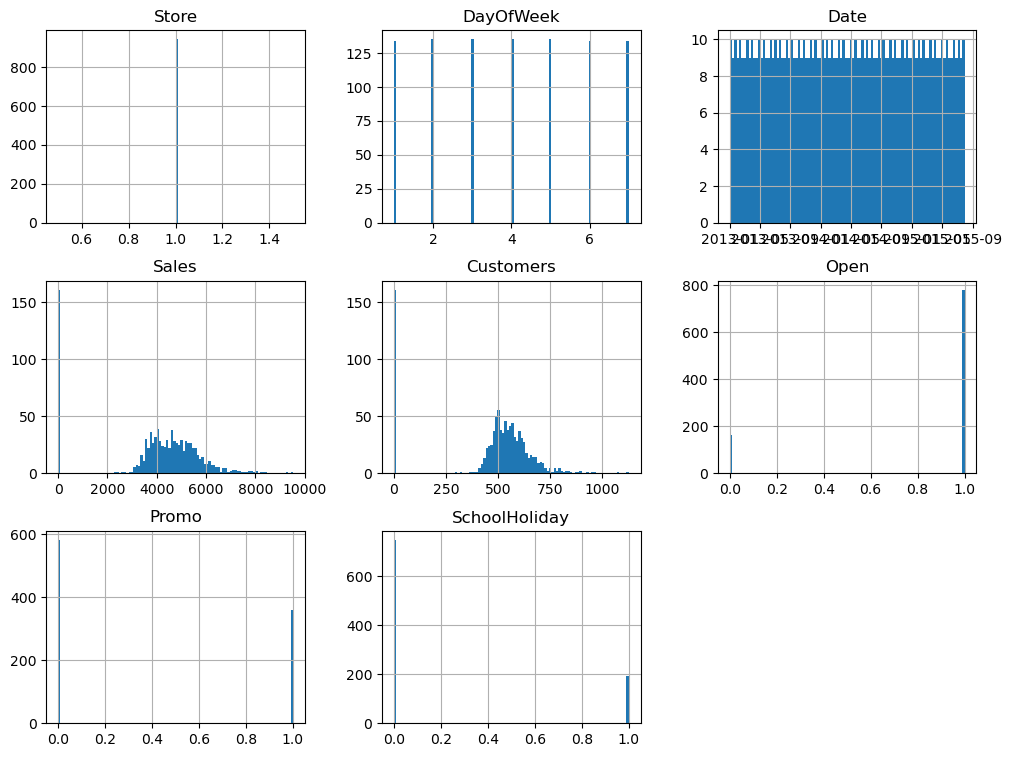

In [485]:
df[df.Store == 1].hist(figsize=(12,9), bins=100)

In [486]:
df[df.Store == 1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1


In [487]:
df_store = df.groupby(['Store','DayOfWeek']).sum()

/var/folders/cp/2vg0mq953918v2_1xmh8chvr0000gn/T/ipykernel_86432/222361751.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_store = df.groupby(['Store','DayOfWeek']).sum()


In [488]:
df_store.reset_index(inplace=True)
df_store.index

RangeIndex(start=0, stop=7805, step=1)

In [489]:
df.groupby(['Store','DayOfWeek']).sum().reset_index().head(7)

/var/folders/cp/2vg0mq953918v2_1xmh8chvr0000gn/T/ipykernel_86432/1818344533.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Store','DayOfWeek']).sum().reset_index().head(7)


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,662780,76081,128,72,30
1,1,2,627874,73625,134,72,31
2,1,3,601354,71605,132,72,31
3,1,4,552772,66610,124,72,30
4,1,5,609716,72530,129,72,31
5,1,6,662358,80072,134,0,20
6,1,7,0,0,0,0,20


/var/folders/cp/2vg0mq953918v2_1xmh8chvr0000gn/T/ipykernel_86432/2308311724.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Store').mean().reset_index().plot.scatter(x='Store', y='Sales', title="Avg per Sales")


<Axes: title={'center': 'Avg per Sales'}, xlabel='Store', ylabel='Sales'>

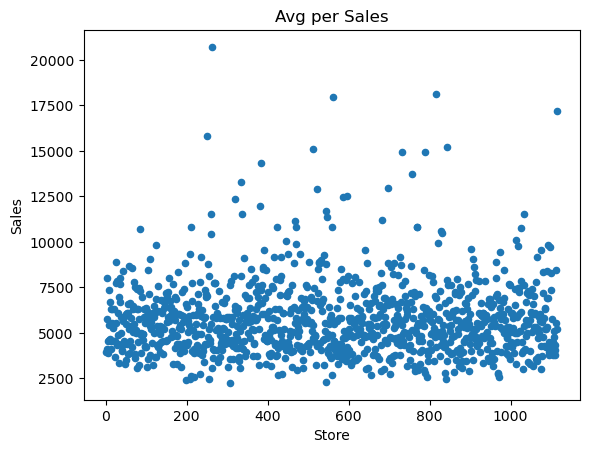

In [490]:
df.groupby('Store').mean().reset_index().plot.scatter(x='Store', y='Sales', title="Avg per Sales")

In [491]:
df.groupby('Store').mean()

/var/folders/cp/2vg0mq953918v2_1xmh8chvr0000gn/T/ipykernel_86432/3143248892.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Store').mean()


,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590
...,...,...,...,...,...,...
1111,3.997877,4342.968153,373.548832,0.826964,0.382166,0.180467
1112,3.997877,8465.280255,693.498938,0.826964,0.382166,0.180467
1113,3.997877,5516.180467,596.763270,0.832272,0.382166,0.168790


In [492]:
import matplotlib.pyplot as plt
df_mean = df.groupby(['Store', 'DayOfWeek'], as_index=False).mean()

/var/folders/cp/2vg0mq953918v2_1xmh8chvr0000gn/T/ipykernel_86432/1004891757.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(['Store', 'DayOfWeek'], as_index=False).mean()


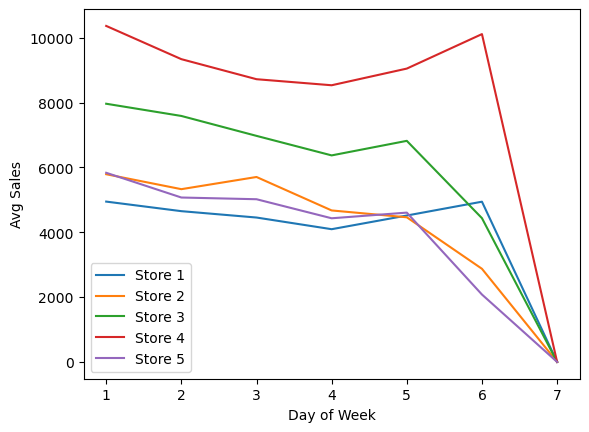

In [493]:
for store in df_mean.Store.unique()[0:5]:
    df_temp = df_mean[df_mean.Store == store]
    plt.plot(df_temp.DayOfWeek, df_temp.Sales, label=f"Store {store}")
    plt.xlabel('Day of Week')
    plt.ylabel('Avg Sales')
plt.legend();


In [494]:
df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [495]:
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000]
df['Sales_sliced'] = pd.cut(df.Sales, bins, include_lowest=True)


In [496]:
df.groupby(['Store', 'Sales_sliced']).DayOfWeek.value_counts().head(25)

Store  Sales_sliced       DayOfWeek
1      (-0.001, 2000.0]   7            134
                          4             11
                          1              6
                          5              6
                          3              3
                          2              1
       (2000.0, 4000.0]   4             43
                          2             42
                          3             42
                          1             28
                          5             28
                          6             13
       (4000.0, 6000.0]   6            109
                          5             91
                          3             83
                          2             80
                          4             72
                          1             70
       (6000.0, 8000.0]   1             26
                          2             12
                          6             10
                          4              9
                  

(844392, 9)

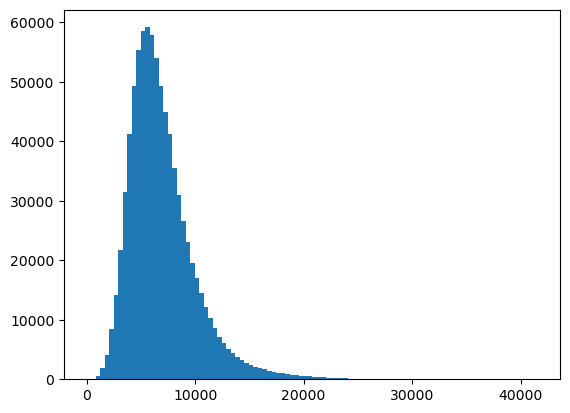

In [571]:
df_week_day = df[df.Open == 1].copy()
plt.hist(df_week_day.Sales, bins=100);
df_week_day.shape

In [576]:
df_week_day.reset_index(inplace=True, drop=True)
print(df_week_day.shape)
df_week_day.head()

(844392, 10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,New_sales
0,1,5,2015-07-31,5263,555,1,1,0,1,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,6064.0
2,3,5,2015-07-31,8314,821,1,1,0,1,8314.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,13995.0
4,5,5,2015-07-31,4822,559,1,1,0,1,4822.0


In [578]:
one_mask = np.ones(df_week_day.shape[0])
zero_mask = np.random.randint(0, high=df_week_day.shape[0], size=round(df_week_day.shape[0]/10))
one_mask[zero_mask] = 0
df_week_day['New_sales'] = df_week_day['Sales'] * one_mask
print(df_week_day.shape)
df_week_day.head()

(844392, 10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,New_sales
0,1,5,2015-07-31,5263,555,1,1,0,1,5263.0
1,2,5,2015-07-31,6064,625,1,1,0,1,6064.0
2,3,5,2015-07-31,8314,821,1,1,0,1,0.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,13995.0
4,5,5,2015-07-31,4822,559,1,1,0,1,0.0


In [588]:
mask = np.random.choice(10, size=df_week_day.shape[0]) == 0
df_week_day['New Sales'] = df_week_day['Sales']
df_week_day.loc[mask, 'New Sales'] = np.nan
df_week_day.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,New_sales,New Sales
0,1,5,2015-07-31,5263,555,1,1,0,1,5263.0,5263.0
1,2,5,2015-07-31,6064,625,1,1,0,1,6064.0,6064.0
2,3,5,2015-07-31,8314,821,1,1,0,1,0.0,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,13995.0,13995.0
4,5,5,2015-07-31,4822,559,1,1,0,1,0.0,4822.0
5,6,5,2015-07-31,5651,589,1,1,0,1,5651.0,5651.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,15344.0,15344.0
7,8,5,2015-07-31,8492,833,1,1,0,1,8492.0,8492.0
8,9,5,2015-07-31,8565,687,1,1,0,1,8565.0,8565.0
9,10,5,2015-07-31,7185,681,1,1,0,1,7185.0,7185.0


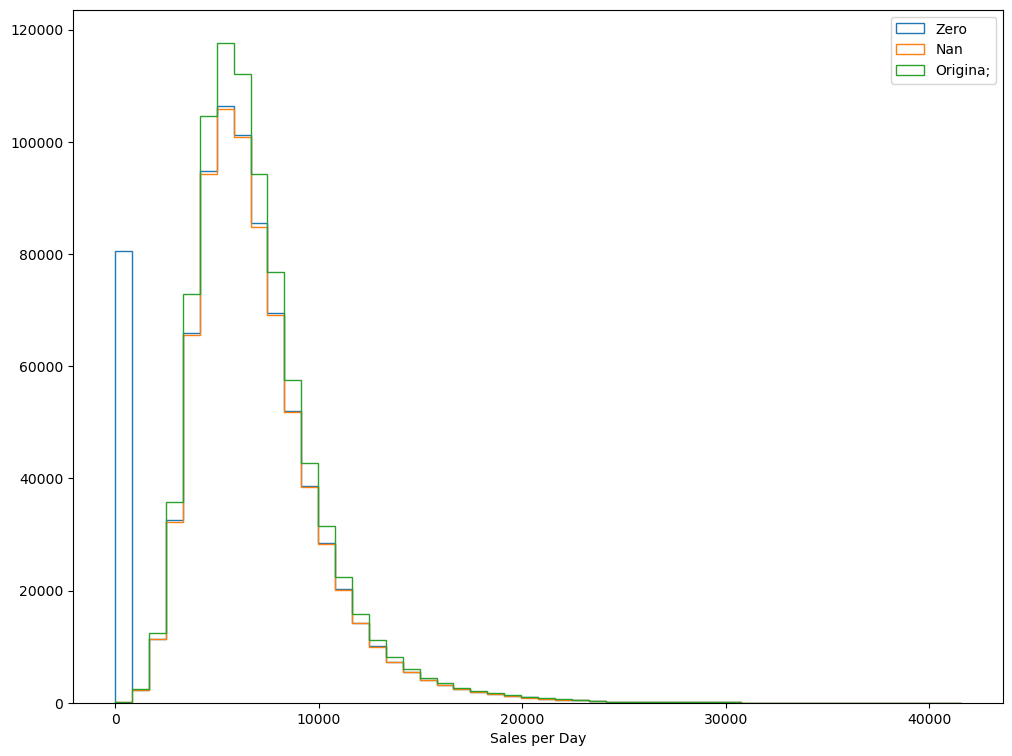

In [603]:
plt.figure(figsize=(12,9))
plt.hist(df_week_day['New_sales'],histtype='step', bins=50, label="Zero")
plt.hist(df_week_day['New Sales'],histtype='step', bins=50, label="Nan")
plt.hist(df_week_day['Sales'],histtype='step', bins=50, label="Origina;")
plt.xlabel('Sales per Day')
plt.legend();

In [604]:
df_y = df.copy()

In [606]:
df_y.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
